# Importação das bibliotecas

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
%matplotlib inline

# Analise exploratória dos dados

In [ ]:
df = pd.read_csv('uf.csv')
display(df)

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo
0,2004,1,RO,Total,NaN,112812.00
1,2004,1,AC,Total,NaN,34840.05
2,2004,1,AM,Total,NaN,274773.00
3,2004,1,RR,Total,NaN,31695.63
4,2004,1,PA,Total,NaN,1011353.04
...,...,...,...,...,...,...
34987,2021,12,RS,Outros,NaN,536361.21
34988,2021,12,MS,Outros,NaN,117731.09
34989,2021,12,MT,Outros,NaN,187555.43
34990,2021,12,GO,Outros,NaN,262164.46


In [27]:
#Todos os atributos deste dataset
colunas = df.columns.tolist()
print(colunas)

['ano', 'mes', 'sigla_uf', 'tipo_consumo', 'numero_consumidores', 'consumo']


In [4]:
#Mostra os objetos dentro do atributo tipo_consumo
objetos_unicos = df['tipo_consumo'].unique()
print(objetos_unicos)

['Total' 'Cativo' 'Residencial' 'Industrial' 'Comercial' 'Outros']


In [5]:
#Mostra os objetos dentro do atributo numero_consumidores
objetos_unicos = df['numero_consumidores'].unique()
print(objetos_unicos)

[    nan 258610. 103396. ... 217344. 234909.  17257.]


In [6]:
#Mostra a frequencia de cada um dos objetos em numero_consumidores
frequencia_objetos = df['numero_consumidores'].value_counts()
print(frequencia_objetos)

404.0      7
441.0      7
9546.0     6
465.0      6
2664.0     6
          ..
3885.0     1
9593.0     1
534.0      1
10961.0    1
17257.0    1
Name: numero_consumidores, Length: 20875, dtype: int64


In [7]:
# crie uma máscara booleana para valores NaN no atributo "numero_consumidores"
mask = df['numero_consumidores'].isna()

# conte o número de valores True na máscara
num_nans = mask.sum()

# imprima o número de valores NaN
print(f'O atributo "numero_consumidores" contém {num_nans} valores NaN.')


O atributo "numero_consumidores" contém 12417 valores NaN.


In [8]:
xnum = 34992 - 12417
print("O número de células válidas no atributo numero_consumidores é de ", xnum)

O número de células válidas no atributo numero_consumidores é de  22575


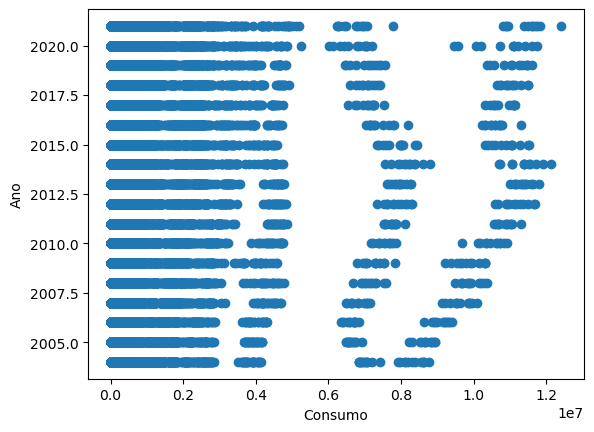

In [18]:
x = df['consumo'].round(6)
y = df['ano']

plt.scatter(x, y)

plt.xlabel('Consumo')
plt.ylabel('Ano')
plt.show()

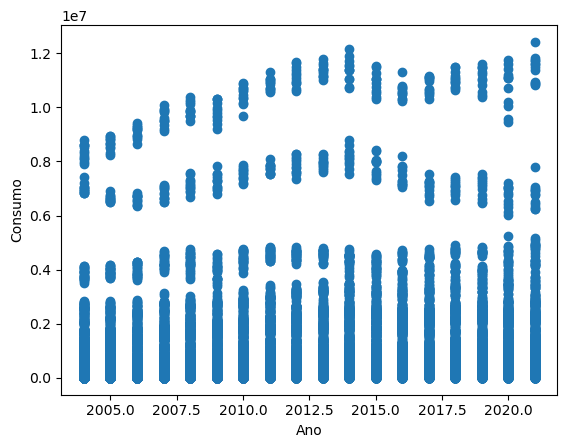

In [19]:
x = df['ano']
y = df['consumo'].round(6)

plt.scatter(x, y)

plt.xlabel('Ano')
plt.ylabel('Consumo')
plt.show()

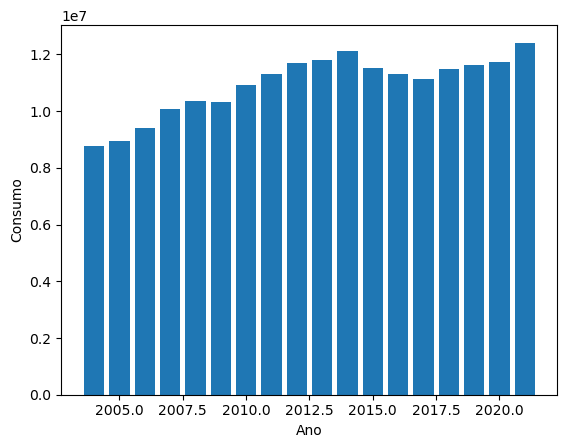

In [17]:
x = df['ano']
y = df['consumo'].round(6)

plt.bar(x, y)

plt.xlabel('Ano')
plt.ylabel('Consumo')
plt.show()

# Limpeza dos dados para o treinamento

In [55]:
# Vendo todas as colunas do dataframe
display(df)

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo
0,2004,1,RO,Total,NaN,112812.00
1,2004,1,AC,Total,NaN,34840.05
2,2004,1,AM,Total,NaN,274773.00
3,2004,1,RR,Total,NaN,31695.63
4,2004,1,PA,Total,NaN,1011353.04
...,...,...,...,...,...,...
34987,2021,12,RS,Outros,NaN,536361.21
34988,2021,12,MS,Outros,NaN,117731.09
34989,2021,12,MT,Outros,NaN,187555.43
34990,2021,12,GO,Outros,NaN,262164.46


In [56]:
#Remove valores ausentes ou infinitos do dataset para poder treinalo
new_df = df.copy()
new_df.replace([np.inf, -np.inf], np.nan, inplace=True) # Substitui valores infinitos por NaN
new_df.fillna(value=0, inplace=True) # Substitui todos os valores ausentes por zero

In [57]:
display(new_df)

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo
0,2004,1,RO,Total,0.0,112812.00
1,2004,1,AC,Total,0.0,34840.05
2,2004,1,AM,Total,0.0,274773.00
3,2004,1,RR,Total,0.0,31695.63
4,2004,1,PA,Total,0.0,1011353.04
...,...,...,...,...,...,...
34987,2021,12,RS,Outros,0.0,536361.21
34988,2021,12,MS,Outros,0.0,117731.09
34989,2021,12,MT,Outros,0.0,187555.43
34990,2021,12,GO,Outros,0.0,262164.46


In [60]:
#Mostra os objetos dentro dos atributos

tipoconsumo = df['tipo_consumo'].unique()
siglauf = df['sigla_uf'].unique()

print("TIPO DE COMSUMO: ", tipoconsumo)
print("SIGLA UF: ", siglauf)

TIPO DE COMSUMO:  ['Total' 'Cativo' 'Residencial' 'Industrial' 'Comercial' 'Outros']
SIGLA UF:  ['RO' 'AC' 'AM' 'RR' 'PA' 'AP' 'TO' 'MA' 'PI' 'CE' 'RN' 'PB' 'PE' 'AL'
 'SE' 'BA' 'MG' 'ES' 'RJ' 'SP' 'PR' 'SC' 'RS' 'MS' 'MT' 'GO' 'DF']


In [64]:
#Substituindo valores nominais do dataset por valores ordinais que possam ser lidos pela maquina

#sigla_uf
mapeamento = {'RO': 1, 'AC': 2, 'AM': 3, 'RR': 4, 'PA': 5, 'AP': 6, 'TO': 7, 'MA': 8, 'PI': 9, 
              'CE': 10, 'RN': 11, 'PB': 12, 'PE': 13, 'AL': 14, 'SE': 15, 'BA': 16, 'MG': 17, 
              'ES': 18, 'RJ': 19, 'SP': 20, 'PR': 21, 'SC': 22, 'RS': 23, 'MS': 24, 'MT': 25,
              'GO': 26, 'DF': 27}
new_df['sigla_uf'] = new_df['sigla_uf'].replace(mapeamento)

#tipo_consumo
mapeamento = {'Total': 1, 'Cativo': 2, 'Residencial': 3, 'Industrial': 4, 'Comercial': 5, 'Outros': 6}
new_df['tipo_consumo'] = new_df['tipo_consumo'].replace(mapeamento)

In [66]:
#Mostrando novamente os dados limpos
display(new_df)

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo
0,2004,1,1,1,0.0,112812.00
1,2004,1,2,1,0.0,34840.05
2,2004,1,3,1,0.0,274773.00
3,2004,1,4,1,0.0,31695.63
4,2004,1,5,1,0.0,1011353.04
...,...,...,...,...,...,...
34987,2021,12,23,6,0.0,536361.21
34988,2021,12,24,6,0.0,117731.09
34989,2021,12,25,6,0.0,187555.43
34990,2021,12,26,6,0.0,262164.46


In [67]:
#Guarda o novo dataframe dentro de um outro csv com os dados já limpos para o treinamento
new_df.to_csv('novos_dados.csv', index=False)

# Treinamento do modelo

In [69]:
#Mostrando o novo dataset limpo e pronto para o treinamento
dados = pd.read_csv('novos_dados.csv')
display(dados)

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo
0,2004,1,1,1,0.0,112812.00
1,2004,1,2,1,0.0,34840.05
2,2004,1,3,1,0.0,274773.00
3,2004,1,4,1,0.0,31695.63
4,2004,1,5,1,0.0,1011353.04
...,...,...,...,...,...,...
34987,2021,12,23,6,0.0,536361.21
34988,2021,12,24,6,0.0,117731.09
34989,2021,12,25,6,0.0,187555.43
34990,2021,12,26,6,0.0,262164.46


In [71]:
#Variáveis independente x que será usada para prever o consumo
X = dados[['ano', 'mes', 'sigla_uf', 'tipo_consumo', 'numero_consumidores']]

#Variável dependente y que será prevista, no caso o consumo
y = dados['consumo']

In [72]:
#dividindo os dados em conjuntos de treinamento e teste:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
#Criando a instancia de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [76]:
#fazendo previsões com o modelo usando os dados de teste
y_pred = model.predict(X_test)

In [77]:
#Avaliando o desempenho do modelo usando métricas como R² e MAE:
from sklearn.metrics import r2_score, mean_absolute_error
print('R²:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R²: 0.1674096861849198
MAE: 564974.6870631436


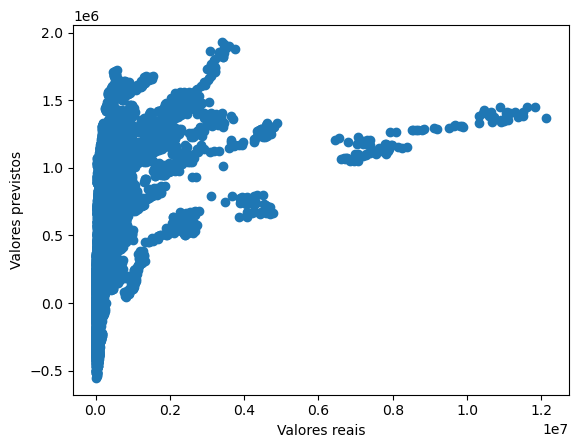

In [78]:
#Visualizando as previsões do modelo em comparação com os valores reais usando um gráfico de dispersão:
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.show()

In [79]:
#Exportando o modelo para o uso em streamlit
import pickle

with open('modelo.pkl', 'wb') as file:
    pickle.dump(model, file)

# Testando o modelo injetando uma previsão nele

In [85]:
#Tenta prever qual será o consumo residencial em dezembro de 2023 no estado de são paulo de uma casa com 3 pessoas
X_new = np.array([[2023, 12, 20, 3, 3]])
y_pred = model.predict(X_new)
print('A previsão é:', y_pred)

A previsão é: [1035990.69237391]


C:\Users\Valde\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


No Dataset o consumo é em MWh então podemos dizer que é 1035990.69237391 MWh, não sei se esta previsão esta correta vamos testar outra.

In [84]:
#Tenta prever qual será o consumo residencial em janeiro de 2021 no estado de roraima de uma casa com 1 pessoas
X_new = np.array([[2021, 1, 1, 3, 1]])
y_pred = model.predict(X_new)
print('A previsão é:', y_pred)

A previsão é: [272633.18266954]


C:\Users\Valde\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Bom, precisamos levar em consideração que:

    1. O consumo é mensal em MWh não KWh
    2. Faz muito sentido que quando formos medir individualmente pessoa por pessoa como vem na conta de luz o consumo por KWh, mas aqui medimos coletivamente em MWh por mês
    3. Isso significa que medimos uma região inteira (no caso um estado) e dividimos essa medição em mês, ano, tipo de consumo e numero de consumidores.
    4. Por isso a minha premissa acima de que podemos medir "Tenta prever qual será o consumo residencial em dezembro de 2023 no estado de são paulo de uma casa com 3 pessoas" ou então "Tenta prever qual será o consumo residencial em janeiro de 2021 no estado de roraima de uma casa com 1 pessoas" esta errada, não estamos prevendo de uma unica pessoa e sim de um coletivo inteiro, sendo assim o modelo pode prever o consumo por estado, por ano, por mês, por tipo de consumo e por numero de consumidores, só que repare que, quando o dataset foi limpo quase dez mil entradas de numero_consumidores foram substituidas por 0.0 pois estavam nulas (NaN) oque significa que o número de consumidores pode não intervir tanto assim na saída do modelo.
    5. Resumindo, o modelo pode prever por coletivo não por individuo, logo é inútil tentar usa-lo para poder ver de quanto será o consumo da sua casa.

# Remoção da coluna numero_consumidores para ver se isso afeta as saídas do modelo

In [86]:
new_df = new_df.drop('numero_consumidores', axis=1)
display(new_df)

,ano,mes,sigla_uf,tipo_consumo,consumo
0,2004,1,1,1,112812.00
1,2004,1,2,1,34840.05
2,2004,1,3,1,274773.00
3,2004,1,4,1,31695.63
4,2004,1,5,1,1011353.04
...,...,...,...,...,...
34987,2021,12,23,6,536361.21
34988,2021,12,24,6,117731.09
34989,2021,12,25,6,187555.43
34990,2021,12,26,6,262164.46


In [98]:
new_df.to_csv('novos_dados_sem_numero_consumidores.csv', index=False)

In [106]:
data = pd.read_csv('novos_dados_sem_numero_consumidores.csv')
display(data)

,ano,mes,sigla_uf,tipo_consumo,consumo
0,2004,1,1,1,112812.00
1,2004,1,2,1,34840.05
2,2004,1,3,1,274773.00
3,2004,1,4,1,31695.63
4,2004,1,5,1,1011353.04
...,...,...,...,...,...
34987,2021,12,23,6,536361.21
34988,2021,12,24,6,117731.09
34989,2021,12,25,6,187555.43
34990,2021,12,26,6,262164.46


In [107]:
#Variáveis independente x que será usada para prever o consumo
Xdata = data[['ano', 'mes', 'sigla_uf', 'tipo_consumo']]

#Variável dependente y que será prevista, no caso o consumo
ydata = data['consumo']

In [108]:
#dividindo os dados em conjuntos de treinamento e teste:
from sklearn.model_selection import train_test_split
Xdata_train, Xdata_test, ydata_train, ydata_test = train_test_split(Xdata, ydata, test_size=0.2, random_state=42)

In [109]:
#Criando a instancia de regressão linear
model = LinearRegression()
model.fit(Xdata_train, ydata_train)

LinearRegression()

In [110]:
#fazendo previsões com o modelo usando os dados de teste
ydata_pred = model.predict(Xdata_test)

In [111]:
#Avaliando o desempenho do modelo usando métricas como R² e MAE:
from sklearn.metrics import r2_score, mean_absolute_error
print('R²:', r2_score(ydata_test, ydata_pred))
print('MAE:', mean_absolute_error(ydata_test, ydata_pred))

R²: 0.16264141477091232
MAE: 565816.2274686036


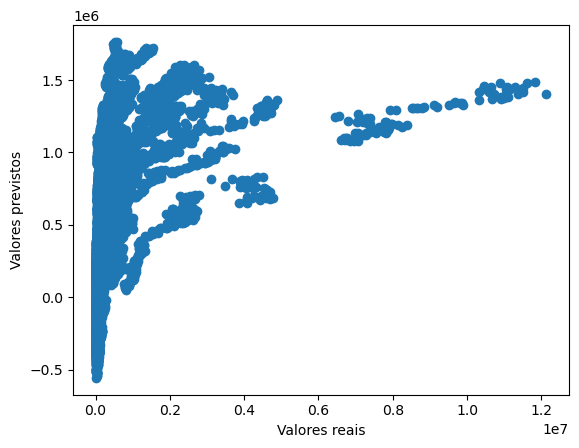

In [112]:
#Visualizando as previsões do modelo em comparação com os valores reais usando um gráfico de dispersão:
plt.scatter(ydata_test, ydata_pred)
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.show()

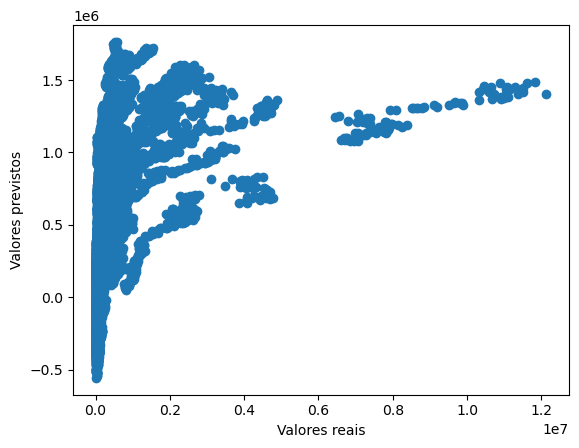

In [113]:
#Comparando ou o outro:
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.show()

### Como pode ver a coluna "numero_consumidores" parece não causar nenhum impacto no treinamento do modelo.

Vamos então testar da mesma forma de antes: 

In [115]:
#Tenta prever qual será o consumo residencial em dezembro de 2023 no estado de são paulo de uma casa com 3 pessoas
Xdata_new = np.array([[2023, 12, 20, 3]])
ydata_pred = model.predict(Xdata_new)
print('A previsão é:', ydata_pred)

#Tenta prever qual será o consumo residencial em janeiro de 2021 no estado de roraima de uma casa com 1 pessoas
Xdata_new = np.array([[2021, 1, 1, 3]])
ydata_pred = model.predict(Xdata_new)
print('A previsão é:', ydata_pred)

A previsão é: [1069577.48741759]
A previsão é: [282875.54044172]


C:\Users\Valde\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Valde\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


As antigas previsões eram de: 

    A previsão é: [1035990.69237391]
    A previsão é: [272633.18266954]
    
Com um MAE e um R² de:

    R²: 0.16264141477091232
    MAE: 565816.2274686036

E as novas são de: 

    A previsão é: [1069577.48741759]
    A previsão é: [282875.54044172]

Com um MAE e um R² de:

    R²: 0.16264141477091232
    MAE: 565816.2274686036
    
Podemos então ver que intervere sim no modelo a ausência do atributo "numero_consumidores" por mais que este impacto seja pequeno, quase irrelevante, visto que o R² e o MAE são idênticos podemos assumir que usar ou não este atributo infere pouco na predição.

Podemos ainda notar que:

    1. Existe pouca diferença de uma predição para outra
    2. Nesta pouca diferença notamos que os números sem a coluna numero_consumidores são maiores que os que possuem esta coluna
    3. Esta diferença deve ser causada por uma extrapolação que o modelo faz na falta desta coluna, uma vez que sem ela a predição deve ficar menos exata.
    4. Concluindo: a coluna faz diferença e que é melhor mante-la SE POSSÍVEL.